## **Part 11: Linear Regression**

#### **Types of Linear Regression**
- Simple Linear Regression
- Multiple Linear Regression
- Polynomial Regression

$$
{\ y = mx + c}
$$

$$
{\ m = \frac{y_2 - y_1}{x_2 - x_1}}
$$

#### **Linear Regression Equation**
$$
{\ Y = \beta_0 + \beta_1 x}
$$

**Simple explanation**
- **Y** = Predicted value, or dependent variable, also called the response variable.

- **x**: Independent variable, also called the predictor or the features (input value)

- **beta 0**: The intercept, the value of y when x = 0. Shows where the line cross y-axis

- **beta 1**: The slope which tell how much y changes for a unit change in x. Represent the strength and direcction where the line crosses the Y-axis

#### **Regression Slope**

$$
\begin{align}
\beta_1 &= \frac{ \sum\limits_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) }
                { \sum\limits_{i=1}^{n} (x_i - \bar{x})^2 } \\[1em]
\beta_0 &= \bar{y} - \beta_1 \bar{x}
\end{align}
$$

#### **Sample Correlation Coefficient**
$$
r = \frac{ \sum\limits_{i=1}^{n} (x_i - \bar{x}) (y_i - \bar{y}) }
         { \sqrt{ \sum\limits_{i=1}^{n} (x_i - \bar{x})^2 } 
           \sqrt{ \sum\limits_{i=1}^{n} (y_i - \bar{y})^2 } }
$$



### **Model Evaluation**
**Properties**
- SST: Total sum of squares  
- SSE: Error sum of squares  
- SSR: Regression sum of squares  

$$
\small
SST = \sum\limits_{i=1}^{n} (y_i - \bar{y})^2
$$

$$
\small
SSR = \sum\limits_{i=1}^{n} (\hat{y}_i - \bar{y})^2
$$

$$
\small
SSE = \sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

#### **Always remember that**

$$
\small
SST = SSR + SSE
$$

#### **Minimizing the error**

$$
\small
\text{Residual} = y_i - \hat{y}_i
$$


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, \
    accuracy_score, precision_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("D:/OneDrive/DME_2_FirstSem/IML/Datasets/xy_data.csv")
np_data = df.to_numpy()

In [3]:
##### Remember that in linear regression, we need to reshape the data
x = np_data[:, 0].reshape(-1, 1)
y = np_data[:, 1].reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

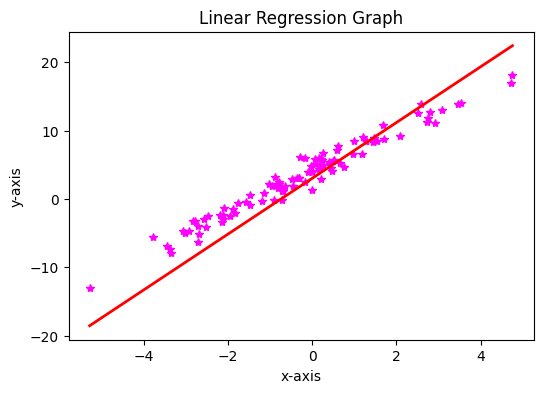

In [4]:
m = lin_reg.intercept_[0]
c = lin_reg.coef_[0, 0]

x_line = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
y_line = m * x_line + c

plt.figure(figsize=(6,4))
plt.plot(x, y, "*", c = "magenta")
plt.plot(x_line, y_line, c = "red", lw = 2)
plt.title("Linear Regression Graph")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

#### **With SGD Regressor**

In [5]:
from sklearn.linear_model import SGDRegressor

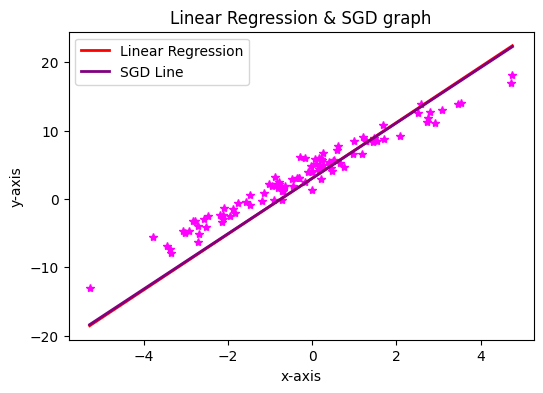

In [6]:
sgd_reg = SGDRegressor(max_iter=1000)
sgd_reg.fit(x_train, y_train.ravel())

m_sgd = sgd_reg.intercept_[0]
c_sgd = sgd_reg.coef_[0] #### we need only 1 index, NOT LIKE LINEAR REGRESSION

x_line_sgd = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
y_line_sgd = m_sgd * x_line_sgd + c

plt.figure(figsize=(6,4))
plt.plot(x, y, "*", c = "magenta")
plt.plot(x_line, y_line, c = "red", lw = 2, label = "Linear Regression")
plt.plot(x_line_sgd, y_line_sgd, lw=2, c = "purple", label = "SGD Line")
plt.title("Linear Regression & SGD graph")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.show()

In [7]:
y_pred_linear = lin_reg.predict(x_test)
y_pred_sgd = sgd_reg.predict(x_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)

print(f"MSE Linear Regression: {mse_linear:.4f}")
print(f"MSE SGD: {mse_sgd:.4f}")

MSE Linear Regression: 1.1465
MSE SGD: 1.1518


#### **Calories prediction using Linear Regression**

In [8]:
x = list(range(5, 61, 5))
y = [8,42,102,113,148,206,202,230,360,354,427,432]

x = np.array(x).reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)

x_pred = [[8], [18], [33], [59], [85], [100]] 
y_pred = model.predict(x_pred)

for (i, j) in enumerate(x_pred):
    cal = f"{y_pred[i]:.2f}"
    print(f"Time {j[0]} min, burned {cal} calories")
print()

ic = "{:.2f}".format(model.intercept_)
ce = "{:.2f}".format(model.coef_[0])
print(f"Equation of prediction: y = {ic} + {ce}x")

Time 8 min, burned 23.87 calories
Time 18 min, burned 103.38 calories
Time 33 min, burned 222.64 calories
Time 59 min, burned 429.37 calories
Time 85 min, burned 636.10 calories
Time 100 min, burned 755.36 calories

Equation of prediction: y = -39.74 + 7.95x


#### **Creating the model from scratch**

In [9]:
#### I will import my custom model that I created
from LinearRegression_model import linear_train

Coefficient: [1.63033724 1.90153681]
Training error: 4.1466


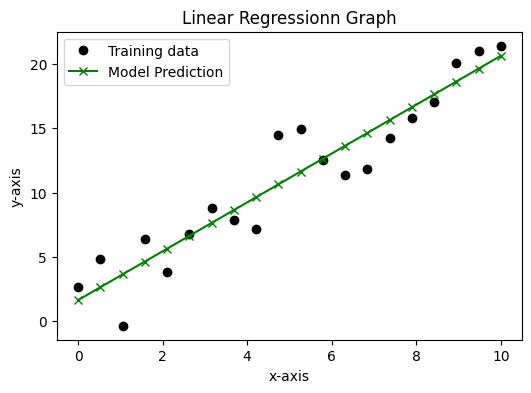

In [10]:
def train_model(x_data, y_data):
    w = linear_train(x_data, y_data)
    return w

def prediction(x_data, w):
    y_pred = w[0] + w[1] * x_data
    return y_pred

def train_error(pred, y_data):
    N = len(y_data)
    error = 0
    for i in range(N):
        diff = pred[i] - y_data[i]
        error += diff ** 2
    mse = error / N
    return mse

def plot_linear(x_data, y_data, predictions):
    plt.figure(figsize=(6,4))
    plt.plot(x_data, y_data, "ko", label="Training data")
    plt.plot(x_data, predictions, "gx-", label="Model Prediction")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.title("Linear Regressionn Graph")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    x_data = np.linspace(0, 10, 20)
    noise = np.random.normal(0,2, size=x_data.shape)    
    y_data = 2 * x_data + 1 + noise   

    w = train_model(x_data, y_data)
    pred = prediction(x_data, w)

    error_mse = train_error(pred, y_data)
    print(f"Coefficient: {w}")
    print(f"Training error: {error_mse:.4f}")

    plot_linear(x_data, y_data, pred)

#### **How about polynomial Regression??**

Polynomial function:

$$\hat{y} = f(x, w) =  \sum_{m=0}^D w_m \cdot x^m$$

In [11]:
from PolyReg_model import poly_train

Training error = 0.10319529022050092


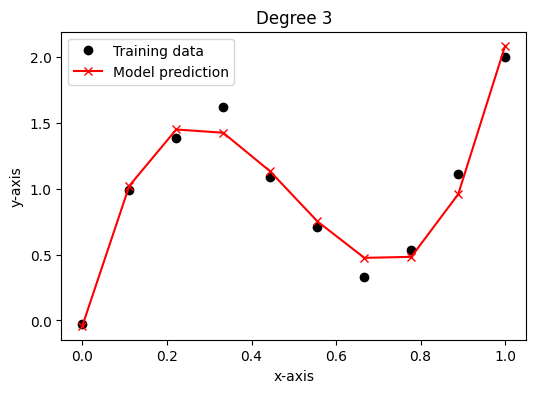

In [12]:
def fmodel(x, w):
    m = len(w)
    y = 0
    for i in range(m):
        y += w[i] * x**i
    
    return y

def train_model(w0, x_data, y_data):
    w = poly_train(w0, x_data, y_data)
    return w

def compute_predictions(x_data, w):
    N = len(x_data)
    predictions = []
    for i in range(N):
        y_pred = fmodel(x_data[i], w)
        predictions.append(y_pred)
    return predictions

def compute_training_error(pred, y_data):
    N = len(y_data)
    error = 0
    for i in range(N):
        diff = pred[i] - y_data[i]
        error += diff ** 2
    return error

def plot(x_data, y_data, predictions, degree):
    plt.figure(figsize=(6,4))
    plt.plot(x_data, y_data, "ko", label="Training data")
    plt.plot(x_data, predictions, "rx-", label="Model prediction")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.title("Degree " + str(degree))
    plt.legend()
    plt.show()

if __name__ == "__main__":
    w0 = [0, 0, 0, 0] ##### Degree of polynomial  

    DX = np.array([0.000, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1])
    DY = np.array([-0.028, 0.988, 1.387, 1.625, 1.089, 0.713, 0.328, 0.535, 1.112, 2.004])

    x_data = DX
    y_data = DY

    w = train_model(w0, x_data, y_data)

    pred = compute_predictions(x_data, w)
    training_error = compute_training_error(pred, y_data)
    print('Training error =', training_error)

    plot(x_data, y_data, pred, degree=len(w) - 1)

#### **Multiple Linear Regression**

$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n + \varepsilon
$$

$$
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
=
\begin{bmatrix}
1 & X_{11} & X_{12} & \cdots & X_{1p} \\
1 & X_{21} & X_{22} & \cdots & X_{2p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & X_{n1} & X_{n2} & \cdots & X_{np}
\end{bmatrix}
\times
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_p
\end{bmatrix}
+
\begin{bmatrix}
\varepsilon_1 \\
\varepsilon_2 \\
\vdots \\
\varepsilon_n
\end{bmatrix}
$$


In [13]:
import seaborn as sns
from sklearn.metrics import r2_score

In [14]:
np.random.seed(42)
samples = 200

x1 = np.random.rand(samples) * 10
x2 = np.random.rand(samples) * 5
x3 = np.random.rand(samples) * 8
y = 2.5 * x1 + 1.8 * x2 - 0.7 * x3 + np.random.normal(0, 2, samples)

In [15]:
df = pd.DataFrame({
    "Feature 1": x1, 
    "Feature 2": x2, 
    "Feature 3": x3,
    "Target": y
    })

x = df[["Feature 1", "Feature 2", "Feature 3"]]
y = df["Target"]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared: {r2:.2f}")

Coefficients: [ 2.47146926  1.72114141 -0.60477012]
Intercept: -0.1755085572482411
R-squared: 0.96


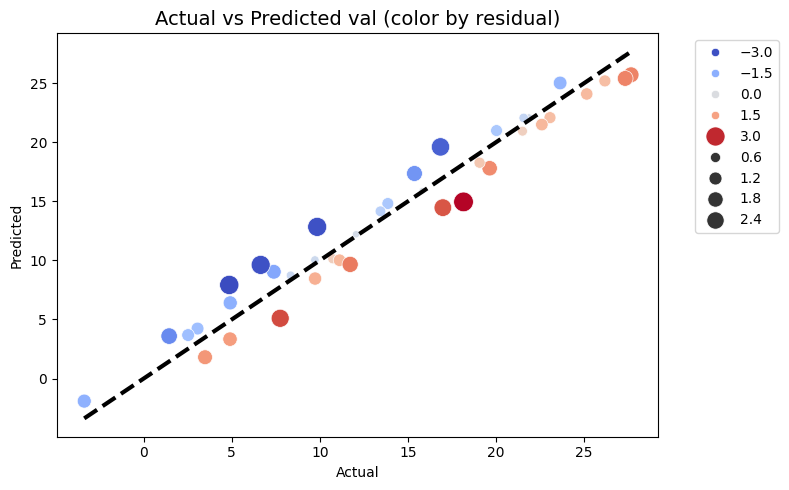

In [ ]:
results = pd.DataFrame({
    "Actual": y_test, 
    "Predicted": y_pred
    })

results["Residual"] = results["Actual"] - results["Predicted"]

plt.figure(figsize=(8,5))
scatter = sns.scatterplot(x="Actual", y="Predicted", data=results, 
                         hue="Residual", palette="coolwarm", 
                         size=np.abs(results["Residual"]), sizes=(20, 200))

plt.plot([results["Actual"].min(), results["Actual"].max()], 
         [results["Actual"].min(), results["Actual"].max()], 
         "k--", linewidth=3)

plt.title("Actual vs Predicted val (color by residual)", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

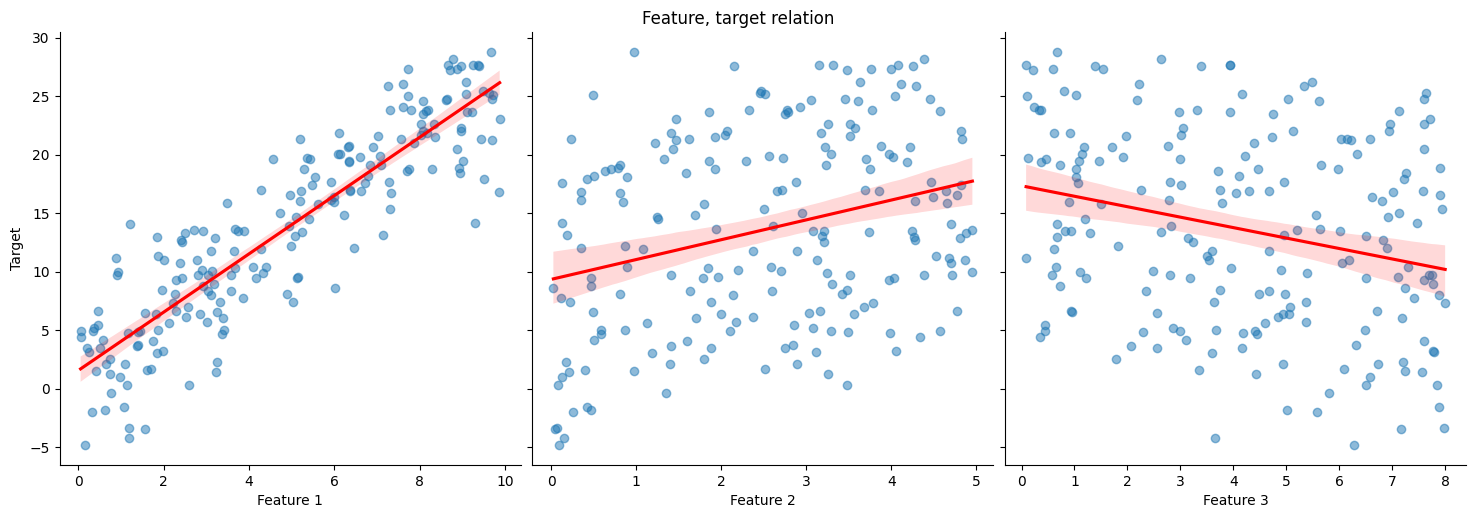

In [19]:
#### PLotting the feature vs the target
sns.pairplot(df, x_vars=["Feature 1", "Feature 2", "Feature 3"],
             y_vars=["Target"], kind = "reg", height = 5,
             plot_kws={"line_kws": {"color": "red"}, "scatter_kws": {"alpha" : 0.5}})
plt.suptitle("Feature, target relation", y = 1.02)
plt.show()

<hr/>

## **Part 12: KMeans clustering**

In [20]:
from sklearn.cluster import KMeans, MeanShift
from sklearn.metrics import silhouette_score

In [21]:
df = pd.read_csv("D:/OneDrive/DME_2_FirstSem/IML/Datasets/data2cluster.csv")
display(df.head(5))

,2.36534382e-01,2.84317035e-02
0,1.119215,0.236164
1,0.782762,-1.034249
2,0.581035,-0.795526
3,1.485990,-1.017748
4,1.136433,-0.828972


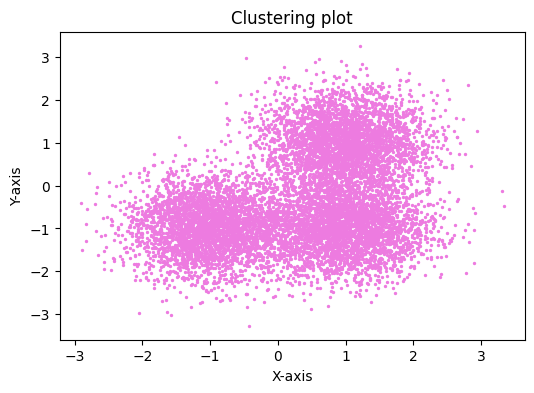

In [22]:
x = df.to_numpy()

plt.figure(figsize=(6,4))
plt.title("Clustering plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.scatter(x[:, 0], x[:, 1], c = "#ED7BE0", s = 2)
plt.show()

In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [24]:
cluster_center = kmeans.cluster_centers_ #### depends how many we apply
cluster_center

array([[-1.02406779, -0.97769846],
       [ 0.98933797,  1.05879208],
       [ 1.02138003, -0.99535099]])

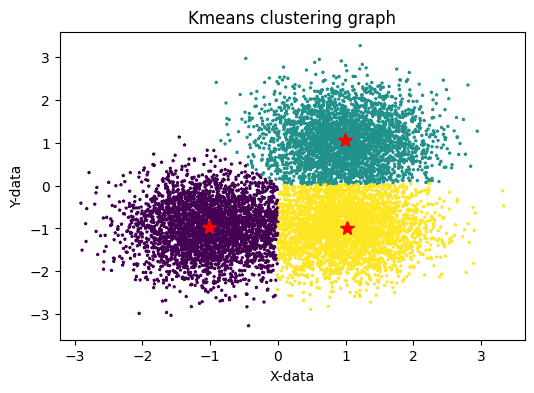

In [25]:
plt.figure(figsize=(6,4))
plt.scatter(x[:, 0], x[:, 1], s = 3, c=kmeans.labels_, marker = "*")
plt.plot(cluster_center[:, 0], cluster_center[:, 1], "*r", markersize=10)
plt.title("Kmeans clustering graph")
plt.xlabel("X-data")
plt.ylabel("Y-data")
plt.show()

In [26]:
labels = kmeans.labels_
score = silhouette_score(x, labels)

print(f"The sihouette score: {score:.4f}")

The sihouette score: 0.4925


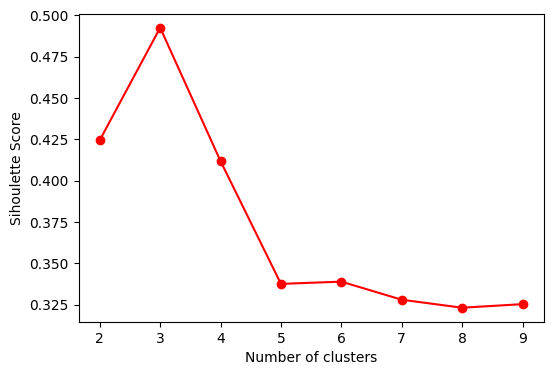

In [27]:
score = [] 
k_range = range(2, 10)

for k in k_range:
    kn = KMeans(n_clusters=k)
    kn.fit(x)
    score.append(silhouette_score(x, kn.labels_))

plt.figure(figsize=(6,4))
plt.plot(k_range, score, marker = "o", c = "red")
plt.xlabel("Number of clusters")
plt.ylabel("Sihoulette Score")
plt.show()

#### **WHAT!!! This is too simple**

Let's do it without using any model (Create it from scratch)
(Code implemented from Geek for Geeks website)

In [28]:
from sklearn.datasets import make_blobs

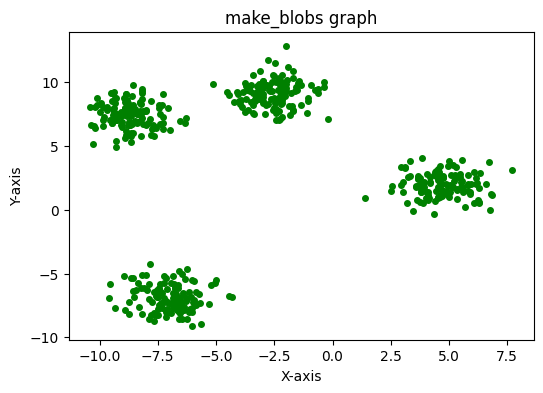

In [29]:
x, y = make_blobs(n_samples=500, n_features=2, centers=4, 
                  random_state=42)

plt.figure(figsize=(6,4))
plt.title("make_blobs graph")
plt.xlabel("X-axis")
plt.ylabel("Y-axis") 
plt.plot(x[:, 0], x[:, 1], "og", markersize=4)
plt.show()

In [30]:
k = 4 #### Number of points
clusters = {}
np.random.seed(42)

for idx in range(k):
    center = 2*(2*np.random.random((x.shape[1],))-1)
    clusters[idx] = {
        "center": center,
        "points": [],
    }

### Display out the clusters
for i, j in clusters.items():
    print(i, j)

0 {'center': array([-0.50183952,  1.80285723]), 'points': []}
1 {'center': array([0.92797577, 0.39463394]), 'points': []}
2 {'center': array([-1.37592544, -1.37602192]), 'points': []}
3 {'center': array([-1.76766555,  1.46470458]), 'points': []}


In [ ]:
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2)) ##### Euclidean distance

def align_clusters(x, clusters):
    for idx in range(x.shape[0]):
        curr_x = x[idx]
        dist = []
        for i in range(k):
            dist.append(distance(curr_x, clusters[i]["center"]))
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]["points"].append(curr_x)
    return clusters

def update_clusters(clusters):
    for i in range(k):
        points = np.array(clusters[i]["points"])
        if points.shape[0] > 0:
            new_center = points.mean(axis=0)
            clusters[i]["center"] = new_center
        clusters[i]["points"] = []  
    return clusters

def pred_cluster(x, clusters):
    pred = []
    for i in range(x.shape[0]):
        dist = [distance(x[i], clusters[j]["center"]) for j in range(k)]
        pred.append(np.argmin(dist))
    return pred

In [32]:
for i in range(10):  # 10 iterations
    clusters = align_clusters(x, clusters)
    clusters = update_clusters(clusters)

pred = pred_cluster(x, clusters)

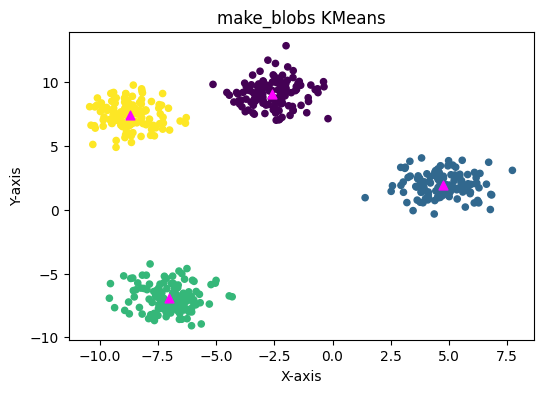

In [33]:
plt.figure(figsize=(6,4))
plt.title("make_blobs KMeans")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.scatter(x[:, 0], x[:, 1], c=pred, cmap="viridis", s=20)
for i in clusters:
    center = clusters[i]["center"]
    plt.scatter(center[0], center[1], marker="^", c="magenta", s=40)
plt.show()

<hr/>

## **Part 13: Dimension Reduction (PCA)**

#### **Dimension Reduction Equation**

$$
\small
\Sigma = \frac{1}{n-1} X^\top X = V \Lambda V^\top
$$

$$
\small
W = V_k
$$

$$
\small
Z = X W
$$

<hr/>

#### **BUT!!! WHAT? how do we compute the PCA??**

**Steps of Computing PCA**
**1. Write M datapoints as a row vector**
**2. Center the data from subtracting the mean from each column**
$$
\small
\text{Given data matrix } X =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1d} \\
x_{21} & x_{22} & \cdots & x_{2d} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nd}
\end{bmatrix}
$$
$$
\small
\text{Get the mean from each col} \quad
\mu_j = \frac{1}{n} \sum_{i=1}^{n} x_{ij}, \quad \text{for } j = 1, 2, \ldots, d
$$

$$
\small
\text{Subtract mean from each col:}
$$

$$
\small
X_{\text{center}} = X - \mathbf{1}\mu^\top
$$

$$
\small
\text{where } 
\mathbf{1} =
\begin{bmatrix}
1 \\ 1 \\ \vdots \\ 1
\end{bmatrix}_{n \times 1},
\quad
\mu =
\begin{bmatrix}
\mu_1 \\ \mu_2 \\ \vdots \\ \mu_d
\end{bmatrix}_{d \times 1}
$$

**3. Compute the covariance matrix**

$$
\small
C = \frac{1}{M - 1} \, B^\top B
$$

$$
\small
x = 
\begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_M
\end{bmatrix},
\quad
y = 
\begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_M
\end{bmatrix}
$$

$$
\small
\quad
\bar{x} = \frac{1}{M} \sum_{i=1}^{M} x_i,
\quad
\bar{y} = \frac{1}{M} \sum_{i=1}^{M} y_i
$$

$$
\small
x \text{ and } y \text{ is:}
$$

$$
\small
\operatorname{Cov}(x, y) = 
\frac{1}{M - 1}
\sum_{i=1}^{M}
(x_i - \bar{x})(y_i - \bar{y})
$$


**For the matrix equation**
$$
\small
B =
\begin{bmatrix}
x_1 - \bar{x} & y_1 - \bar{y} \\
x_2 - \bar{x} & y_2 - \bar{y} \\
\vdots & \vdots \\
x_M - \bar{x} & y_M - \bar{y}
\end{bmatrix}
$$

$$
\small
$$

$$
\small
C = \frac{1}{M - 1} B^\top B
$$

$$
\small
\Rightarrow
C =
\frac{1}{M - 1}
\begin{bmatrix}
\sum (x_i - \bar{x})^2 & \sum (x_i - \bar{x})(y_i - \bar{y}) \\
\sum (y_i - \bar{y})(x_i - \bar{x}) & \sum (y_i - \bar{y})^2
\end{bmatrix}
$$

**4. Compute the eigenvalue and eigenvector**
$$
\small
A \mathbf{v} = \lambda \mathbf{v}
$$

$$
\small
(A - \lambda I)\mathbf{v} = 0
$$

$$
\small
\det(A - \lambda I) = 0
$$

**5. Sort those eigenvectors in order of decreasing eigenvalues**

**6. Reject those with small eigenvalues**

**7. Project those data into the eigenspace of remaining eigenvalues**

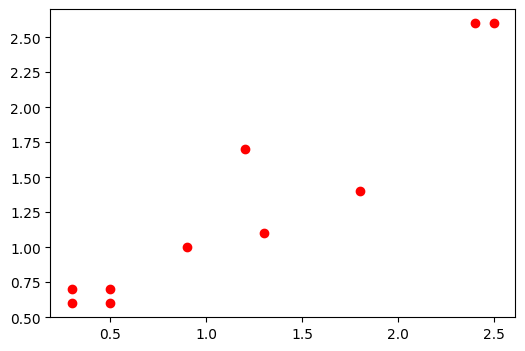

In [34]:
x = np.array(
    [[0.9,1],
    [2.4,2.6],
    [1.2,1.7],
    [0.5,0.7],
    [0.3,0.7],
    [1.8,1.4],
    [0.5,0.6],
    [0.3,0.6],
    [2.5,2.6],
    [1.3,1.1]])

plt.figure(figsize=(6,4))
plt.plot(x[:,0], x[:,1], "ro")
plt.show()

In [35]:
x1 = x[:, 0] - x[:, 0].mean()
x2 = x[:, 1] - x[:, 1].mean()

##### Just checking the mean value
print(x[:, 0].mean())
print(x[:, 1].mean())

1.1700000000000002
1.3


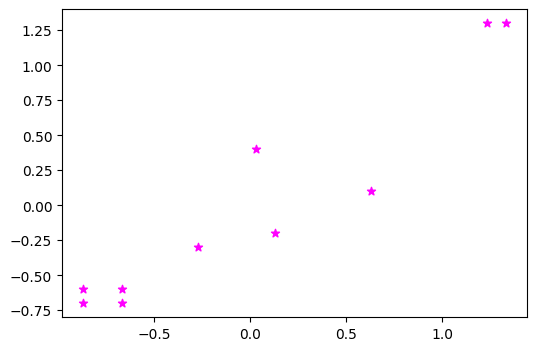

In [36]:
plt.figure(figsize=(6,4))
plt.scatter(x1, x2, marker = "*", c= "magenta")
plt.show()

In [37]:
B = np.column_stack((x1, x2)) #### stack the data-data.mean
C = np.cov(B.T) ### find the covariance

In [38]:
w, v = np.linalg.eig(C)
print(f"The eigenvalues: {w}")
print(f"\nThe eigenvectors: \n{v}")

The eigenvalues: [1.25057433 0.03398123]

The eigenvectors: 
[[ 0.73251454 -0.68075138]
 [ 0.68075138  0.73251454]]


In [39]:
v_proj = np.column_stack((v[:, 0], [0,0]))
v_proj

array([[0.73251454, 0.        ],
       [0.68075138, 0.        ]])

In [40]:
x_proj = B @ v_proj
x_proj

array([[-0.40200434,  0.        ],
       [ 1.78596968,  0.        ],
       [ 0.29427599,  0.        ],
       [-0.89923557,  0.        ],
       [-1.04573848,  0.        ],
       [ 0.5295593 ,  0.        ],
       [-0.96731071,  0.        ],
       [-1.11381362,  0.        ],
       [ 1.85922114,  0.        ],
       [-0.04092339,  0.        ]])

In [41]:
x_r = x_proj @ v.T
x_r

array([[-0.29447403, -0.27366501],
       [ 1.30824877,  1.21580133],
       [ 0.21556144,  0.20032879],
       [-0.65870313, -0.61215586],
       [-0.76601864, -0.71188792],
       [ 0.38790989,  0.36049823],
       [-0.70856916, -0.6584981 ],
       [-0.81588467, -0.75823016],
       [ 1.36190652,  1.26566736],
       [-0.02997698, -0.02785865]])

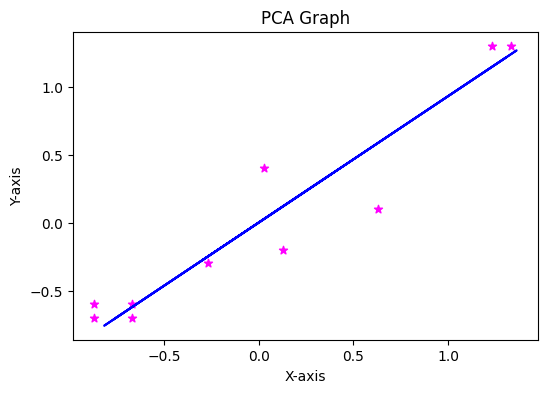

In [42]:
plt.figure(figsize=(6,4))
plt.plot(x_r[:, 0], x_r[:, 1], c="blue")
plt.scatter(x1, x2, marker = "*", c= "magenta")
plt.title("PCA Graph")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

#### **PCA with iris datasets**

In [43]:
from sklearn.datasets import load_iris

In [44]:
def PCA(x, d=0.95, show=False):
    mu = np.mean(x, axis=0)
    x -= mu
    xs = 1 / (len(x) - 1) * x.T @ x  # covariance
    eigvals, a = np.linalg.eig(xs)    # renamed from d to eigvals
    idx = np.argsort(eigvals)[::-1]

    if show:
        plt.figure(figsize=(6,4))
        plt.plot(eigvals)
        plt.xlabel("Index")
        plt.ylabel("Eigenvalues")
        plt.show()

    if isinstance(d, float):
        th = d
        sumD = np.sum(eigvals)
        for i in range(len(eigvals)):
            if np.sum(eigvals[:i+1]) / sumD >= th:
                d = i + 1
                break

    a = a[:, idx[:d]]
    return a, mu, x @ a


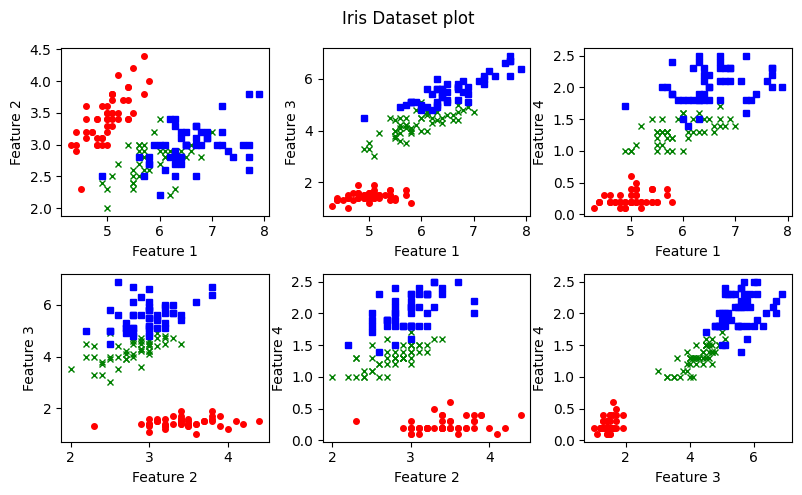

In [51]:
iris = load_iris()
X = iris.data
Y = iris.target
labels = iris.target_names

color = {
    "setosa": "r",
    "versicolor": "g",
    "virginica": "b",
}

marker = {
    "setosa": "o",
    "versicolor": "x",
    "virginica": "s",
}

plt.figure(figsize=(8, 5))
k = 1
for m in range(X.shape[1] - 1):
    for n in range(m + 1, X.shape[1]):
        plt.subplot(2, 3, k)
        for i in range(len(X)):
            label = labels[Y[i]]
            plt.plot(
                X[i][m],
                X[i][n],
                marker=marker[label],
                color=color[label],
                markersize=4
            )
        plt.xlabel(f"Feature {m+1}")
        plt.ylabel(f"Feature {n+1}")
        k += 1

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.suptitle("Iris Dataset plot")
plt.tight_layout()
plt.show()

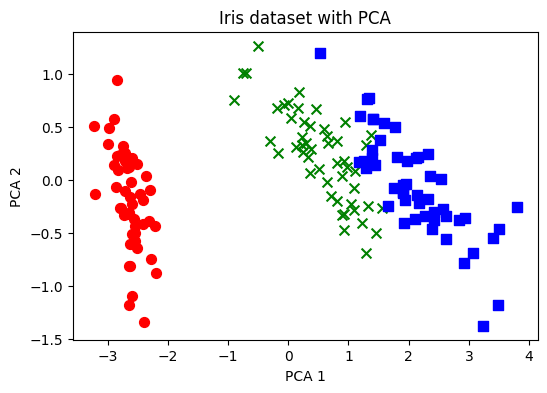

In [46]:
#### Now apply the PCA into the iris dataset
iris = load_iris()
X = iris.data
Y = iris.target
labels = iris.target_names

color = ["r", "g", "b"]
marker = ["o", "x", "s"]

A, _, Z = PCA(X, d=2, show=False)

plt.figure(figsize=(6,4))
for i in range(len(Z)):
    plt.scatter(
        Z[i, 0],
        Z[i, 1],
        c=color[Y[i]],
        marker=marker[Y[i]],
        s=50
    )

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Iris dataset with PCA")
plt.show()

#### **Image processing with dimension reduction (PCA)**

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2

In [48]:
img = cv2.imread("D:/OneDrive/DME_2_FirstSem/IML/img/kurumi.png", cv2.IMREAD_GRAYSCALE)
print(f"Original image shape: {img.shape}")

Original image shape: (720, 720)


In [49]:
x = img.astype(np.float64)

mean_vec = np.mean(x, axis=0)
B = x - mean_vec
C = np.cov(B, rowvar=False)

w, v = np.linalg.eig(C)
idx = np.argsort(w)[::-1]
v = v[:, idx]

#### K values controls the PCA when doing the image processing
'''
k = 50 → use the top 50 PCA for remake.
If your image has, say, 720x720 = 518,400 pixels:
Since k = 50, this will reduce 50 times smaller image, therefore 
the quality will decrease.
'''

k = 15 #### Lower k value, blurer image
w_val = v[:, :k]
z = B.dot(w_val)

x_remake = z.dot(w_val.T) + mean_vec
img_remake = x_remake.reshape(img.shape)

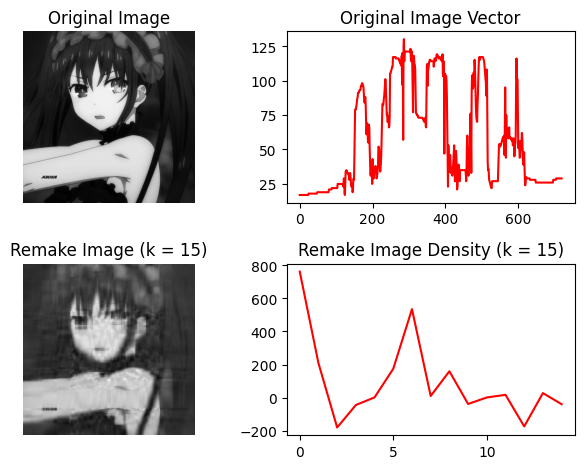

In [50]:
plt.subplot(2,2,1)
plt.imshow(img, cmap=mpl.colormaps["gray"])
plt.axis('off')
plt.title("Original Image")

plt.subplot(2,2,2)
plt.plot(x[0, :], c = "red")
plt.title("Original Image Vector")

plt.subplot(2,2,3)
plt.imshow(img_remake, cmap=mpl.colormaps["gray"])
plt.axis("off")
plt.title(f"Remake Image (k = {k})")

plt.subplot(2,2,4)
plt.plot(z[0, :], c = "red")
plt.title(f"Remake Image Density (k = {k})")

plt.tight_layout()
plt.show()

#### **Continue: IML Exam part 4**